# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.
4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`.
El número de pedidos está en la columna `num_orders`.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
url = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_16/data/taxi.csv'

## Preparación

In [3]:
data = pd.read_csv(url, index_col=[0], parse_dates=[0])

In [4]:
def explorar_dataset(df):
    """
    Explora un DataFrame mostrando información clave.

    Esta función imprime: información general del DataFrame (df.info()),
    sus dimensiones (df.shape), las primeras 15 filas (df.head(15)),
    estadísticas descriptivas (df.describe()), el conteo de valores nulos
    (df.isnull().sum()) y el conteo de filas duplicadas (df.duplicated().sum()).

    Parámetros:
        df (pd.DataFrame): El DataFrame a explorar.
    """
    print('---' * 10, '\n', f'Información del dataframe')
    print(df.info())
    print('---' * 10, '\n', f'Dimensiones del dataframe')
    print(df.shape)
    print('---' * 10, '\n', f'Primeras filas del dataframe')
    print(df.head(15))
    print('---' * 10, '\n', f'Descripción del dataframe')
    print(df.describe())
    print('---' * 10, '\n', f'Valores nulos del dataframe')
    print(df.isnull().sum())
    print('---' * 10, '\n', f'Valores duplicados del dataframe')
    print(df.duplicated().sum())
    print('---' * 10)

In [5]:
explorar_dataset(data)

------------------------------ 
 Información del dataframe
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None
------------------------------ 
 Dimensiones del dataframe
(26496, 1)
------------------------------ 
 Primeras filas del dataframe
                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
2018-03-01 00:50:00          21
2018-03-01 01:00:00           7
2018-03-01 01:10:00           5
2018-03-01 01:20:00          17
2018-03-01 01:30:00          12
2018-03-01 01:40:00          19
2018-03-01 01:50:00          25
2018-03-01 02:00:00          22
2018-03-01 02:10:00     

In [6]:
data.index

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 00:10:00',
               '2018-03-01 00:20:00', '2018-03-01 00:30:00',
               '2018-03-01 00:40:00', '2018-03-01 00:50:00',
               '2018-03-01 01:00:00', '2018-03-01 01:10:00',
               '2018-03-01 01:20:00', '2018-03-01 01:30:00',
               ...
               '2018-08-31 22:20:00', '2018-08-31 22:30:00',
               '2018-08-31 22:40:00', '2018-08-31 22:50:00',
               '2018-08-31 23:00:00', '2018-08-31 23:10:00',
               '2018-08-31 23:20:00', '2018-08-31 23:30:00',
               '2018-08-31 23:40:00', '2018-08-31 23:50:00'],
              dtype='datetime64[ns]', name='datetime', length=26496, freq=None)

In [7]:
print('Comprobar si el indice tiene el creccimiento uniforme')
print(data.index.is_monotonic_increasing)
print('Comprobar si los indices son irrepetibles')
print(data.index.is_unique)

Comprobar si el indice tiene el creccimiento uniforme
True
Comprobar si los indices son irrepetibles
True


In [8]:
print('Obtner los valores minimos y maximos del indice')
print(data.index.min())
print(data.index.max())

Obtner los valores minimos y maximos del indice
2018-03-01 00:00:00
2018-08-31 23:50:00


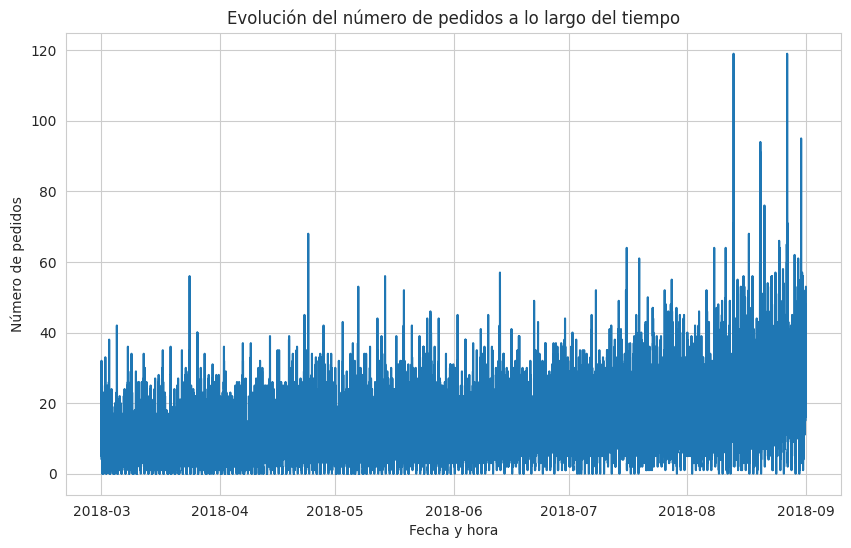

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['num_orders'])
plt.xlabel('Fecha y hora')
plt.ylabel('Número de pedidos')
plt.title('Evolución del número de pedidos a lo largo del tiempo')
plt.show()

## Análisis

In [12]:
ts = data.copy().resample('1h').sum()
ts

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


In [13]:
data_2w = data['2018-03-01':'2018-03-14']

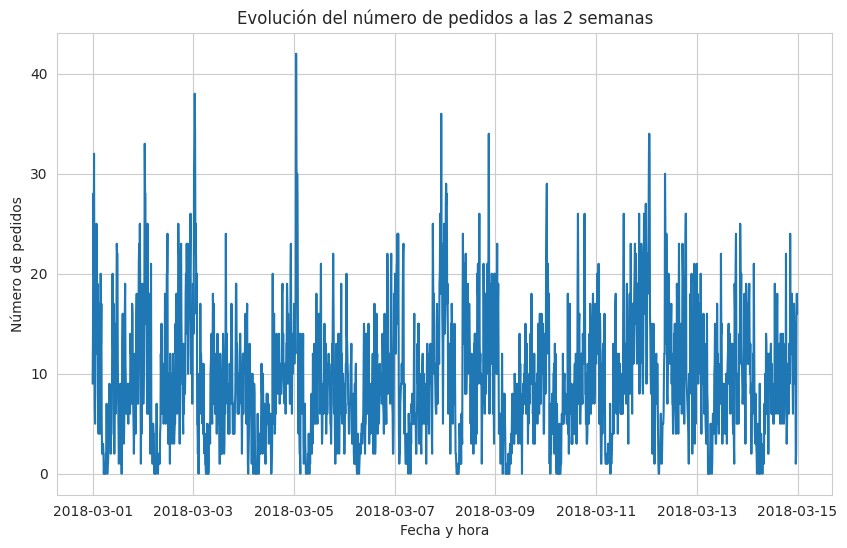

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(data_2w.index, data_2w['num_orders'])
plt.xlabel('Fecha y hora')
plt.ylabel('Número de pedidos')
plt.title('Evolución del número de pedidos a las 2 semanas')
plt.show()

In [15]:
data_2w = data_2w.resample('1h').sum()
data_2w['rolling_mean'] = data_2w['num_orders'].rolling(window=24).mean()

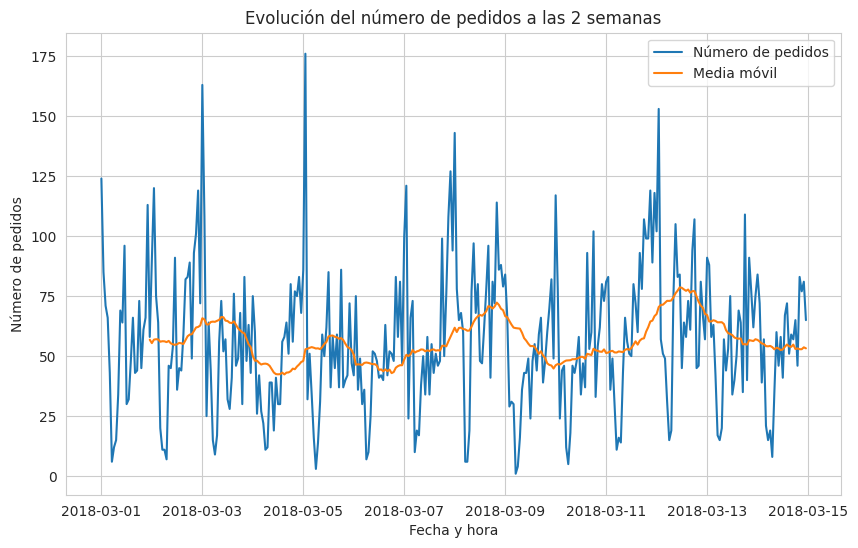

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(data_2w.index, data_2w['num_orders'], label='Número de pedidos')
plt.plot(data_2w.index, data_2w['rolling_mean'], label='Media móvil')
plt.xlabel('Fecha y hora')
plt.ylabel('Número de pedidos')
plt.title('Evolución del número de pedidos a las 2 semanas')
plt.legend()
plt.show()

In [17]:
data_2w['std'] = data_2w['num_orders'].rolling(window=24).std()

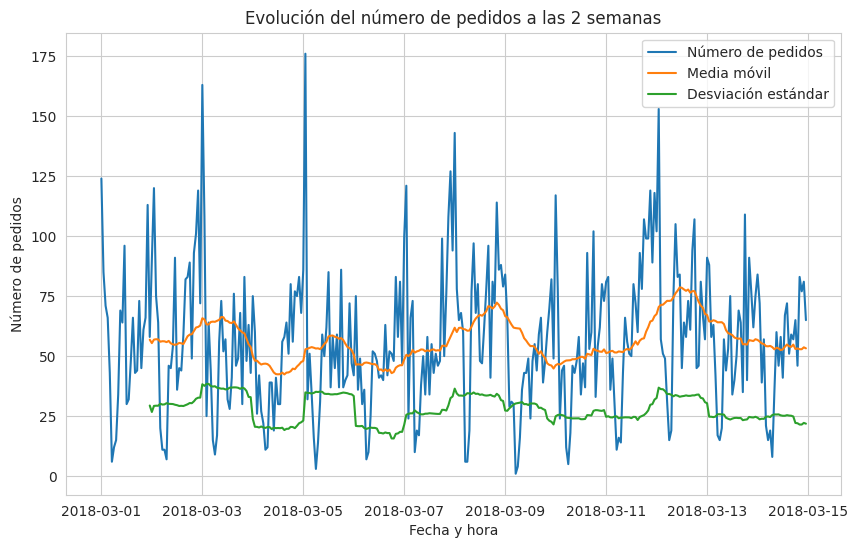

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(data_2w.index, data_2w['num_orders'], label='Número de pedidos')
plt.plot(data_2w.index, data_2w['rolling_mean'], label='Media móvil')
plt.plot(data_2w.index, data_2w['std'], label='Desviación estándar')
plt.xlabel('Fecha y hora')
plt.ylabel('Número de pedidos')
plt.title('Evolución del número de pedidos a las 2 semanas')
plt.legend()
plt.show()


In [21]:
ts_2 = ts.copy().resample('1d').sum()

decomposed = seasonal_decompose(ts_2, model='additive', period=7)

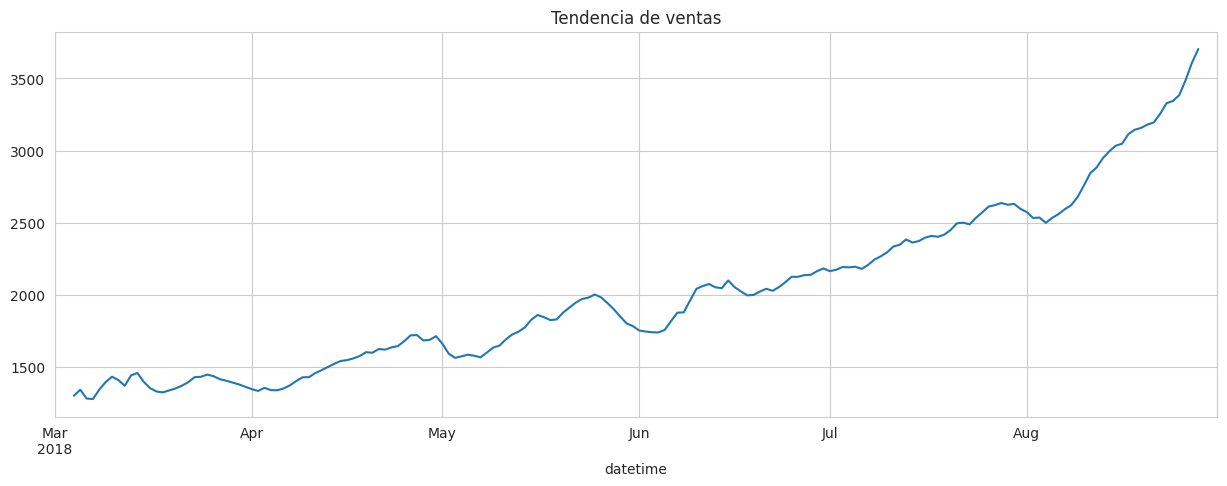

In [26]:
sns.set_style('whitegrid')
decomposed.trend.plot(ax=plt.gca(), figsize=(15, 5))
plt.title('Tendencia de ventas')
plt.show()

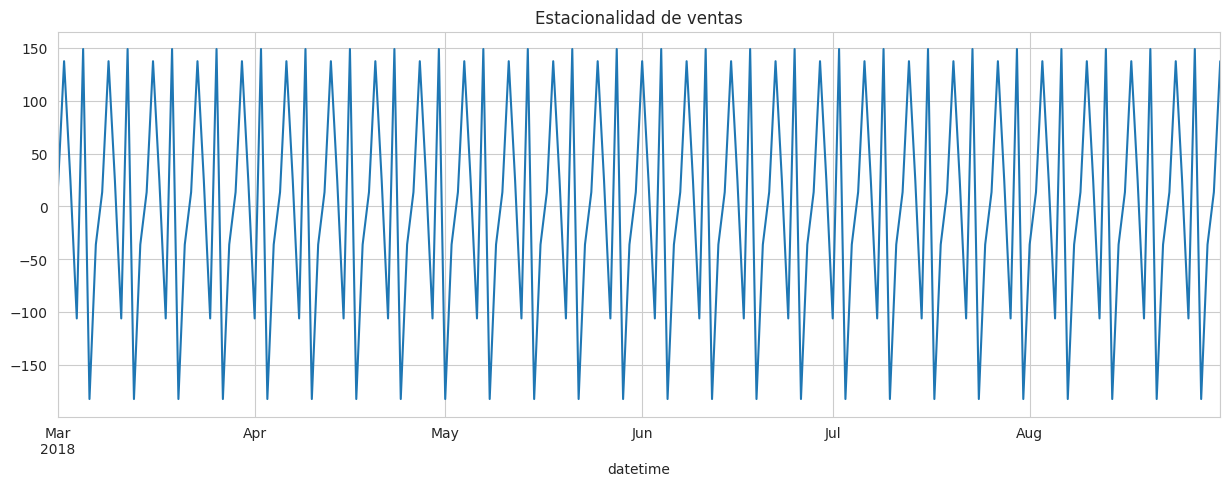

In [28]:
sns.set_style('whitegrid')
decomposed.seasonal.plot(ax=plt.gca(), figsize=(15, 5))
plt.title('Estacionalidad de ventas')
plt.show()

In [ ]:
data_2d =

## Formación

## Prueba

# Lista de revisión

- [x]
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48